In [1]:
#import openl3
import os
import numpy as np
import tensorflow
import bokeh
import pandas as pd

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns

In [2]:
def get_embeddings(files):
   
    result = []
    Data = np.load(files,mmap_mode='r')
    audio_features = Data["embedding"]
    avg_features = audio_features.mean(axis=0)
   
    return avg_features

In [30]:
data = []

flag = 0
flag_array = []

for folder in sorted(os.listdir('/home/ismir2020/embeddings/train/')):
    flag = flag+1
    flag_array = np.full((512,), flag)
    path = '/home/ismir2020/embeddings/train/'+folder+'/'

    print (flag, folder)
    print("==============")

    for npz in sorted(os.listdir(path)):
                       
        if '.npz' in npz:
            fileName, fileExtension = os.path.splitext(npz)
            
            npzpath = path + npz
            embeddings = get_embeddings(npzpath)
            data.append((flag_array, embeddings))

1 angry_q2
2 happy_q1
3 peaceful_q4
4 sad_q3


In [31]:
df = pd.DataFrame(data, columns=['Folder', 'Embed'])
print (df)

                                                Folder  \
0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
4    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
..                                                 ...   
739  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...   
740  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...   
741  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...   
742  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...   
743  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...   

                                                 Embed  
0    [2.602284, 1.9240947, 2.9691825, 2.0971665, 2....  
1    [2.210433, 1.9805816, 3.0046158, 2.3271592, 1....  
2    [2.5621693, 2.5577226, 3.0696821, 1.7912003, 1...  
3    [2.4411745, 2.18425, 3.143267, 1.6783996, 2.33...  
4    [2.6069555, 1

In [32]:
df

,Folder,Embed
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.602284, 1.9240947, 2.9691825, 2.0971665, 2...."
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.210433, 1.9805816, 3.0046158, 2.3271592, 1...."
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.5621693, 2.5577226, 3.0696821, 1.7912003, 1..."
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.4411745, 2.18425, 3.143267, 1.6783996, 2.33..."
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.6069555, 1.8748348, 3.5576122, 2.1840353, 2..."
...,...,...
739,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.6587641, 2.3690047, 3.8572044, 2.2342744, 2..."
740,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.4637456, 2.0439384, 3.1990118, 2.005573, 2...."
741,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.2639265, 2.7766752, 3.5032697, 2.7964485, 2..."
742,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.420479, 2.1853614, 2.9573848, 1.6536711, 2...."


In [33]:
df["Embed"][0].shape

(512,)

In [34]:
temp = np.zeros((744,512))
for i in range(744):
    temp[i] = df['Embed'].values[i]

In [35]:
temp.shape

(744, 512)

In [36]:
temp_valid = np.zeros((744,512)) 
for i in range(744):
    temp_valid[i] = df['Folder'].values[i]

In [37]:
temp_valid.shape

(744, 512)

In [38]:
temp

array([[2.60228395, 1.92409468, 2.96918249, ..., 1.5697093 , 2.96076655,
        2.77480149],
       [2.21043301, 1.98058164, 3.00461578, ..., 2.31909895, 2.83450866,
        2.58847237],
       [2.56216931, 2.55772257, 3.06968212, ..., 1.5308193 , 3.49337173,
        3.23071694],
       ...,
       [2.26392651, 2.77667522, 3.50326967, ..., 1.85600185, 3.62606335,
        2.99332952],
       [2.42047906, 2.18536139, 2.95738482, ..., 1.53555608, 3.13010335,
        2.34072757],
       [2.79245925, 2.41427612, 3.46658397, ..., 2.35139108, 2.93064547,
        2.72032571]])

In [39]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(temp)

In [40]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.21436871 0.15335999 0.08916732]


In [41]:
rndperm = np.random.permutation(df.shape[0])
print (len(rndperm))

744


In [42]:
df

,Folder,Embed,pca-one,pca-two,pca-three
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.602284, 1.9240947, 2.9691825, 2.0971665, 2....",-1.940452,2.791959,2.659630
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.210433, 1.9805816, 3.0046158, 2.3271592, 1....",-1.305367,5.744969,1.209584
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.5621693, 2.5577226, 3.0696821, 1.7912003, 1...",2.422040,1.286796,-5.131267
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.4411745, 2.18425, 3.143267, 1.6783996, 2.33...",-3.230542,3.677373,-1.014264
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.6069555, 1.8748348, 3.5576122, 2.1840353, 2...",-5.279104,4.065472,0.644857
...,...,...,...,...,...
739,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.6587641, 2.3690047, 3.8572044, 2.2342744, 2...",-4.366256,-2.895152,2.658966
740,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.4637456, 2.0439384, 3.1990118, 2.005573, 2....",-0.572645,2.459134,0.134302
741,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.2639265, 2.7766752, 3.5032697, 2.7964485, 2...",4.052205,-3.082464,-2.855221
742,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[2.420479, 2.1853614, 2.9573848, 1.6536711, 2....",-1.605926,4.419022,3.406804


In [43]:
df['Folder'].values[0].shape

(512,)

In [44]:
df['Folder'].values.shape

(744,)

In [45]:
temp2 = np.zeros(744)
for i in range(744):
    temp2[i] = df['Folder'].values[i][0]

In [46]:
temp2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [47]:
df['y'] = temp2

In [48]:
def f(x):
    return np.int(x)

No handles with labels found to put in legend.


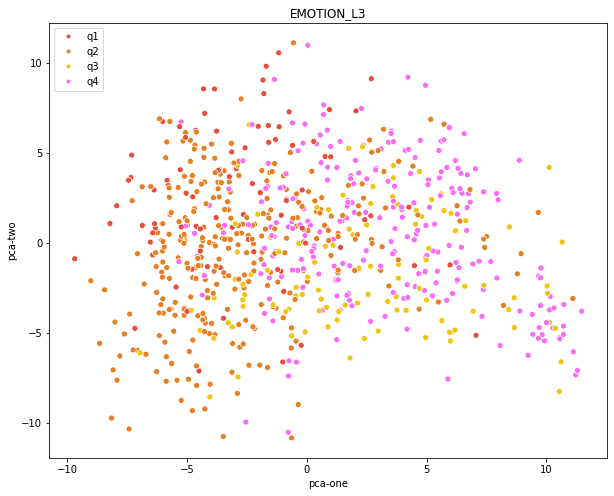

In [49]:
from matplotlib.lines import Line2D

plt.figure(figsize=(10,8))

flatui = ["#E74C3C", "#E67E22", "#F1C40F", "#f96df4"]#,


sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette(flatui), #muted #hls #Set1
    data=df.loc[rndperm,:],
    legend=False,
    alpha=1
)

custom = [Line2D([], [], marker='.', color="#E74C3C", linestyle='None'),
          Line2D([], [], marker='.', color="#E67E22", linestyle='None'),
          Line2D([], [], marker='.', color="#F1C40F", linestyle='None'),
          Line2D([], [], marker='.', color="#f96df4", linestyle='None')
         ]

# fig = plt.figure(figsize=(8,5))
plt.legend(loc='upper left')
plt.legend(custom, ['q1','q2','q3','q4'], loc='upper left')


plt.title('EMOTION_L3') 
plt.show()

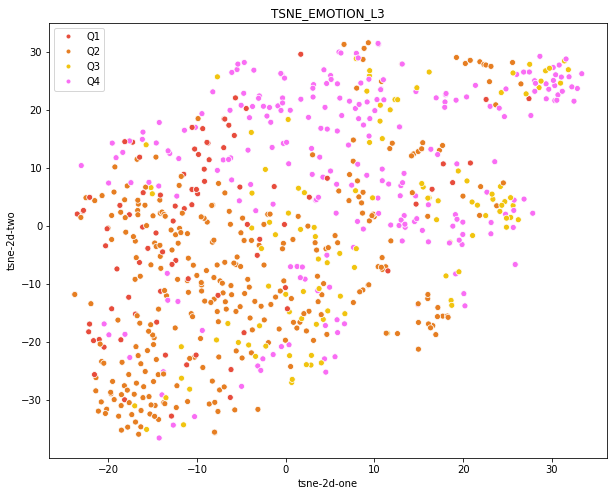

In [50]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0,
            n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean',
            init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5)



tsne_results = tsne.fit_transform(temp)

# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]


flatui = ["#E74C3C", "#E67E22", "#F1C40F", "#f96df4"]

plt.figure(figsize=(10,8))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='y',
    palette=sns.color_palette(flatui),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=1
)

custom = [Line2D([], [], marker='.', color="#E74C3C", linestyle='None'),
         Line2D([], [], marker='.', color="#E67E22", linestyle='None'),
         Line2D([], [], marker='.', color="#F1C40F", linestyle='None'),
         Line2D([], [], marker='.', color="#f96df4", linestyle='None')#

         ]

# fig = plt.figure(figsize=(8,5))
plt.legend(loc='upper left')
plt.legend(custom, ['Q1','Q2','Q3','Q4'], loc='upper left')


plt.title('TSNE_EMOTION_L3')
plt.show()

In [51]:
# coding= UTF-8
import numpy as np
import sklearn
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [53]:
# Split into train and test sets (744 Audios total)
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size=0.10, random_state=12345678)

# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

# Implement simple linear SVM
svm_clf = SVC(C=50.0, gamma = 0.00001, decision_function_shape="ovr") #These parameters can be modified
# svm_clf = SVC(decision_function_shape="ovo") #These parameters can be modified

# Fit model
svm_clf.fit(X_train, y_train) 

# Make predictions
y_predict = svm_clf.predict(X_test)

# print('Prediction')
# print(y_predict)
# #print
# print("Actual")
# print(y_test)

# Accuracy
acc = svm_clf.score(X_test, y_test)
print
print("accuracy=%0.3f" %acc)

/home/mesl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy=0.705


In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [55]:
# Plot the confusion matrix DataFrame
labels = ['Q1', 'Q2', 'Q3', 'Q4']

cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict, target_names=labels))

              precision    recall  f1-score   support

          Q1       0.67      0.25      0.36         8
          Q2       0.75      0.90      0.82        52
          Q3       0.67      0.11      0.19        18
          Q4       0.65      0.82      0.73        34

    accuracy                           0.71       112
   macro avg       0.68      0.52      0.52       112
weighted avg       0.70      0.71      0.66       112



In [56]:
# coding= UTF-8
import numpy as np
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [ ]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size = 0.15, random_state = 12345678)

# Neural Network Construction
model = Sequential()

# Architecture
model.add(Conv1D(64, 3, activation='relu', input_shape = (512, 1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Which is the best loss function for binary (multiple) classification
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



# Convert label to onehot
# Converts a class vector (integers) to binary class matrix
y_train = keras.utils.to_categorical(y_train - 1, num_classes=4) 
y_test = keras.utils.to_categorical(y_test - 1, num_classes=4)

X_train = np.expand_dims(X_train, axis=2) # Make 2-dim into 3-dim array to fit model
X_test = np.expand_dims(X_test, axis=2)

# Train Network
model.fit(X_train, y_train, batch_size=64, epochs=1000)
print(model.summary())

# Compute accuracy with test data
# Computes the loss & accuracy based on the input you pass it
score, acc = model.evaluate(X_test, y_test, batch_size=16) 

print('Test score:', score) #loss
print('Test accuracy:', acc)

In [34]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(446, 512, 1)
(298, 512, 1)
(446, 4)
(298, 4)


In [57]:
# coding= UTF-8
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size=0.10, random_state=12345678)

# Build the Neural Network
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=512)) ## Dense method for MLP
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Convert label to onehot
# Convert class vector into binary Matrix
y_train = keras.utils.to_categorical(y_train-1, num_classes=4) 
y_test = keras.utils.to_categorical(y_test-1, num_classes=4)

# Train and test
# Epochs are tunable
model.fit(X_train, y_train, epochs=1000, batch_size=64) 
print (model.summary())
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd 

In [62]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size=0.10, random_state=0)

# Initialize classifier
gnb_clf= GaussianNB() #check input params

# Train model
gnb_clf.fit(X_train, y_train)
#model = gnb_clf.fit(X_train, y_train)

# Make predictions
prediction = gnb_clf.predict(X_test)

#print('Predicted values')
#print(prediction)
#print
#print('Actual values')
#print(y_test)
#print

# Evaluate accuracy
#print(accuracy_score(y_test,prediction)) 
print
acc = gnb_clf.score(X_test, y_test) 
print("Accuracy = %0.3f" %acc)

Accuracy = 0.616


In [64]:
from sklearn.ensemble import RandomForestClassifier #Random Forest classifier
import pandas as pd 
import numpy as np
np.random.seed(0)

In [ ]:

#Split data
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size=0.10, random_state=12345678)

# Initialize classifier
rf_clf = RandomForestClassifier(n_jobs=2, random_state=0) #Check params

# Train model
rf_clf.fit(X_train, y_train)

# Make predictions
y_prediction = rf_clf.predict(X_test)

# print('Predicted values')
# print(y_prediction)
# print
# print('Actual values')
# print(y_test)
# print

# Evaluate accuracy
print
acc = rf_clf.score(X_test, y_test) 
print("Accuracy = %0.3f" %acc)

In [50]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size = 0.10, random_state = 12345678)


# Reshape data for LSTM (Samples, Timesteps, Features)
X_train = np.expand_dims(X_train, axis=2) #(280,193,1)
X_test = np.expand_dims(X_test, axis=2)

y_train = keras.utils.to_categorical(y_train - 1, num_classes=4) # Converts a class vector (integers) to binary class matrix
y_test = keras.utils.to_categorical(y_test - 1, num_classes=4)

# Build RNN Neural Network
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=X_train.shape[1:]))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(y_train.shape[1], activation='softmax'))

#model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
#model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
#model.add(Dense(units=genre_features.train_Y.shape[1], activation='softmax'))
          
print("Compiling ...")
model.compile(loss='categorical_crossentropy', # for multiple classes
              optimizer='adam', 
              metrics=['accuracy'])

print(model.summary())

print("Training ...")
model.fit(X_train, y_train, batch_size=35, epochs=1000)

print("\nValidating ...")
score, accuracy = model.evaluate(X_test, y_test, batch_size=35, verbose=1)
print("Loss:  ", score)
print("Accuracy:  ", accuracy)